\begin{align*}
P(x) =  \frac{1} {\sigma \sqrt{2\pi}} · e^{- \frac{1}{2}·(\frac{x - \mu}{\sigma})^2}
\end{align*}
\
mu... průměr \
sigma ... smodch \
x ... hodnota, k níž hledáme pravděpodobnost


\begin{align*}
\frac{x - \mu}{\sigma}
\end{align*}

Říká, kolik smodch je hodnota x daleko od průměru a říká se ji standardní z-score

Normální rozdělení je spojitou verzí binomického rozdělení.
Dle větě o limitě střední hodnoty (central limit theorem), mám nějakou populaci. Když z ní budu brát stále větší a větší vzorky a budu pro ně počítat průměry, tak histogram těch průměrů dává normální rozdělení

100


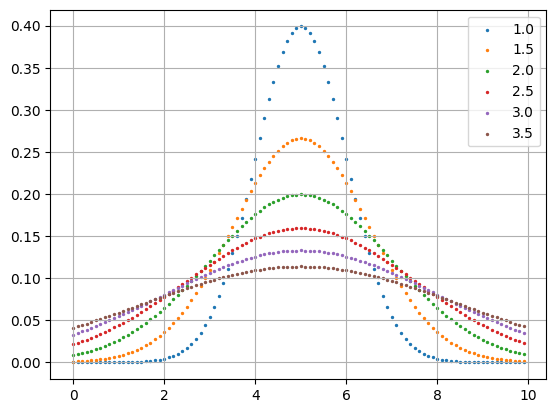

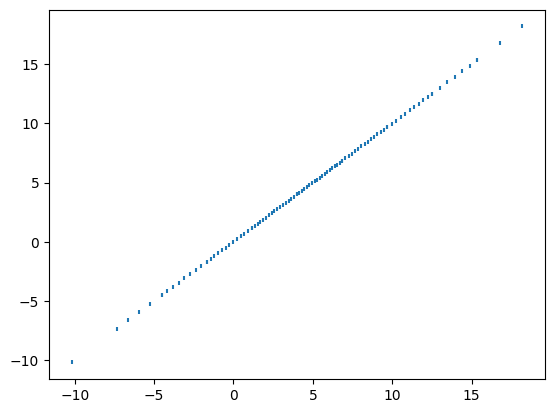

In [24]:
from math import factorial as f, exp as e, pi, sqrt
from typing import Any
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

from numpy import linspace as npLinspace
from itertools import chain as iterChain

class normalDistro(object):
    def __init__(self, mean: float, stdev: float) -> float:
        self._mean:float = mean
        self._stdev:float = stdev
        self._jmenovatel:float = 1/(self.stdev*sqrt(2*pi))

    @property
    def mean(self) -> float: return self._mean
    
    @property
    def stdev(self) -> float: return self._stdev
    
    def getZScore(self, value: float) -> float:
        return (value-self.mean)/self.stdev
    
    def __call__(self, value: float) -> float:
        _exp = e(-0.5 * self.getZScore(value)**2)
        return self._jmenovatel*_exp
    
    def generatePoints(self, minVal: float, maxVal: float, bins: int = 20, count: int = 500) -> list[float]:
        _ranges = npLinspace(minVal, maxVal, bins+1).tolist()
        _bins: list[list[float]] = [_ranges[i:i+2] for i in range(bins)]
        _binAvgs = [sum(bin)/len(bin) for bin in _bins]
        _zscores = [self.getZScore(binAvg)**2 for binAvg in _binAvgs]
        _bins    = [val[0] for val in sorted(zip(_bins, _zscores), key=lambda member: member[1])]
        _index  = 1
        _weights = []
        for bin in _bins:
            _weights.append(_index)
            _index += 1
        _weights.sort(reverse=True)
        _items = [int((count*_weight)/sum(_weights)) for _weight in _weights]
        _index = 0

        while sum(_items) != count:
            _items[_index] += 1
            _index += 1
            if _index == bins - 1: _index = 0
            
        print(sum(_items))
        
        for _index, _weight in enumerate(_items):
            _bins[_index].append(_weight)
        
        _bins: list[float] = list(iterChain(*[npLinspace(_minVal, _maxVal, _count).tolist() for _minVal, _maxVal, _count in _bins]))
        _bins.sort()
        return _bins
        

_xVals:list[float] = [_xi/100 for _xi in range(0,1000,10)]
_mean:float = 5.0
for _stdev in [_xi/100 for _xi in range(100, 400, 50)]:
    _norm: normalDistro = normalDistro(mean=_mean,  stdev=_stdev)
    _probs: list[float] = [_norm(_xi) for _xi in _xVals]
    plt.scatter(_xVals, _probs, label=f"{_stdev}", s= 2)

points = _norm.generatePoints(-10.2, 18.2, 10, 100)
plt.legend()
plt.grid()
plt.show()
plt.scatter(points, points, marker="|", s=5)
plt.show()